In [4]:
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [12]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [13]:
def createdataframe(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for imagename in os.listdir(os.path.join(directory, label)):
            image_paths.append(os.path.join(directory, label, imagename))
            labels.append(label)
        print(label, "завершено")
    return image_paths, labels

In [14]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TEST_DIR)

angry завершено
disgust завершено
fear завершено
happy завершено
neutral завершено
sad завершено
surprise завершено


In [15]:
print(train)

                                  image     label
0                   test\angry\2830.jpg     angry
1                   test\angry\2836.jpg     angry
2                   test\angry\2843.jpg     angry
3                   test\angry\2847.jpg     angry
4                   test\angry\2859.jpg     angry
...                                 ...       ...
7424  test\surprise\Training_870398.jpg  surprise
7425    test\surprise\Training_8796.jpg  surprise
7426  test\surprise\Training_941343.jpg  surprise
7427  test\surprise\Training_976799.jpg  surprise
7428  test\surprise\Training_991508.jpg  surprise

[7429 rows x 2 columns]


In [16]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TRAIN_DIR)

angry завершено
disgust завершено
fear завершено
happy завершено
neutral завершено
sad завершено
surprise завершено


In [17]:
print(test)
print(test['image'])

                                      image     label
0         train\angry\Training_10118481.jpg     angry
1         train\angry\Training_10120469.jpg     angry
2         train\angry\Training_10131352.jpg     angry
3         train\angry\Training_10161559.jpg     angry
4          train\angry\Training_1021836.jpg     angry
...                                     ...       ...
28704  train\surprise\Training_99916297.jpg  surprise
28705  train\surprise\Training_99924420.jpg  surprise
28706  train\surprise\Training_99937001.jpg  surprise
28707  train\surprise\Training_99951755.jpg  surprise
28708  train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]
0           train\angry\Training_10118481.jpg
1           train\angry\Training_10120469.jpg
2           train\angry\Training_10131352.jpg
3           train\angry\Training_10161559.jpg
4            train\angry\Training_1021836.jpg
                         ...                 
28704    train\surprise\Training_99916297.jpg
2870

In [18]:
from tqdm.notebook import tqdm

In [19]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [20]:
train_features = extract_features(train['image']) 

  0%|          | 0/7429 [00:00<?, ?it/s]

D:\Train\venv\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [21]:
test_features = extract_features(test['image'])


  0%|          | 0/28709 [00:00<?, ?it/s]

In [32]:
x_train = test_features/255.0
x_test = train_features/255.0

In [23]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [40]:
y_train = le.transform(test['label'])
y_test = le.transform(train['label'])

In [41]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

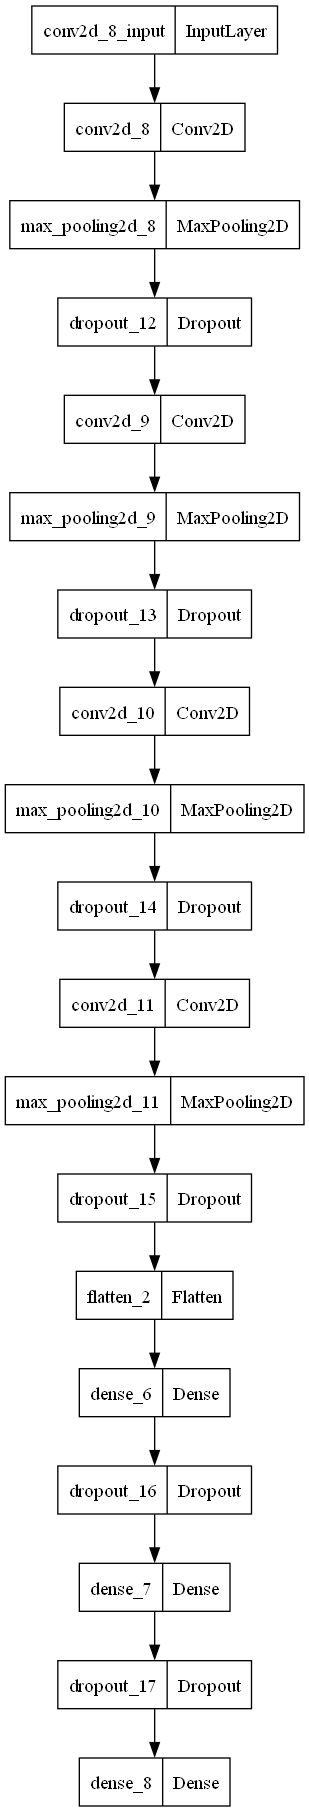

In [5]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))
plot_model(model)

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [45]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100

225/225 [==============================] - 157s 687ms/step - loss: 1.8244 - accuracy: 0.2470 - val_loss: 2.0859 - val_accuracy: 0.1386
Epoch 2/100
225/225 [==============================] - 147s 652ms/step - loss: 1.7927 - accuracy: 0.2525 - val_loss: 2.1444 - val_accuracy: 0.2195
Epoch 3/100
225/225 [==============================] - 147s 653ms/step - loss: 1.7033 - accuracy: 0.3062 - val_loss: 2.0785 - val_accuracy: 0.2594
Epoch 4/100
225/225 [==============================] - 151s 669ms/step - loss: 1.5746 - accuracy: 0.3774 - val_loss: 1.7408 - val_accuracy: 0.3649
Epoch 5/100
225/225 [==============================] - 149s 664ms/step - loss: 1.4790 - accuracy: 0.4251 - val_loss: 1.7588 - val_accuracy: 0.3834
Epoch 6/100
225/225 [==============================] - 149s 664ms/step - loss: 1.4359 - accuracy: 0.4460 - val_loss: 1.6876 - val_accuracy: 0.4007
Epoch 7/100
225/225 [==============================] - 149s 662ms/step - loss: 1.3928 - accuracy: 0.4638 - val_loss: 

In [46]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

D:\Train\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
